---

# Artificial Intelligence - COMPSCI4004 2023-2024

## Lab Week 3: Deterministic problems

----

**Aim**

We will examine how a particular class of AI-problems can be solved using classical search techniques such as A-star. We will formulate a Maze-navigation problem as a graph-search problem in Python and use the `AIMA Toolbox` (https://github.com/aimacode/aima-python) to suggest a solution (i.e., a set of actions) which hopefully leads the agent from the initial state to the goal state. We will furthermore explore the limitations of A-star for general Maze-navigation problems when the environment turns stochastic. 

Finally, we will apply our methods to a problem in the Open AI. The course work will be a custom problem defined so it is important you know how to interact with the API.

**Objectives:**
* Formulate the agent function as an graph-search problem based on the PEAS analysis/characterization
* Get hands-on experience with A* and heuristic functions
* Appreciate the limitations of A-star for general navigation problems

**Guide**:

The notebook has two parts:
   - Part I (Q3.0-Q3.3): Runs through the basics of A-star without you having to write a lot of code but you should be focused on   inspecting and understanding the problem and A-star algorithm.
   - Part II (Q3.4): In the second part, we ask you to solve the Open AI Gym FrozenLake problem using A-star. This is an open-ended task and requires more programming from you.

Each part contains specific tasks - often open-ended questions - that you'll need to carry out to make the notebook run or be able to understand the next steps. These are indicated with:

* <font color=dark-magenta>TASK:</font> This is a task for you to carry out before proceeding. 
* <font color=green>CHECKPOINT:</font> This indicates a key point you should understand before proceeding. If you're in doubt then consult the lab assistants.
* A basic model solution (marked with <font color=red>SOLUTION</font>) will be provided a week after the Lab session.



---
### Q3.0 Prerequisites / housekeeping

The notebook relies on the following software:
- A Python 3.7+ environment and additional packages (see the imports in sec Q3.0 for specific requirements)
- **AIMA Toolbox**: https://github.com/aimacode/aima-python which comes with the book (free) and contains off-the-shelf implementations of various search algorithms and many other relevant methods.However, we recommend you download a special as the github version is unstable and a few bug fixes have been made offline - you can download it from here. Note: You should not install it via pip install or similar!
- The OpenAI Python package in Q3.4 (you can wait to install this)

#### Q3.0.1 Import the basics

* <font color=dark-magenta>TASK:</font> Run the following cell which loads the very basic Python modules and checks the environmental variables

In [1]:
# Check the very basics
import os, sys
print("Working dir:"+os.getcwd())
print("Python version:"+sys.version)

Working dir:/Users/debasis/teaching/ai-2025/labs/week3/lab_week03_search
Python version:3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


#### Q3.0.2 Import Python core modules

* <font color=dark-magenta>TASK:</font> Run the following code to import core Python models

In [2]:
from copy import deepcopy 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

#### Q3.0.2 Import Python Network/Graph modules

* <font color=dark-magenta>TASK:</font> Run the cell to import the graph module allowing you to work with graphs in Python:

In [3]:
import networkx as nx
print("networkx version:"+nx.__version__)

networkx version:2.5


#### Q3.0.2 Import Python visualization modules


* <font color=dark-magenta>TASK:</font> Import modules which allows you to visualise the graphs and solutions. Note: You can skip this step if you fail installing the the `ipywidgets` Python package however you will not be able to interactively visualize the graphs and solutions. `ipywidgets`  is easy to install ia the Anaconda package but can be tricky to run on custom Python setups in which case we recommend skipping the step.

In [4]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
print("ipywidgets version:" + widgets.__version__)

ipywidgets version:7.5.1


#### Q3.0.2 Import the AIMA Toolbox


* <font color=dark-magenta>TASK:</font> Download/pull the AIMA toolbox from https://moodle.gla.ac.uk/mod/resource/view.php?id=3717838

* <font color=dark-magenta>TASK:</font> Import the AIMA toolbox into the search path. Remember to change the `AIMA_TOOLBOX_ROOT` variable to match the relevant folder on your system

In [5]:
# Add path the to the AIMA Python Toolbox folder on your system
# WARNING: It is important that you use forward slash, even on Windows machines !

#AIMA_TOOLBOX_ROOT=os.path.join(os.path.dirname(sys.path[0]),'aima-python-uofg')#"C:/Users/Bjorn/OneDrive - University of Glasgow/ug/ai_2020-2021_shared/tools/aima-python-uofg_v20212022a"                   
#sys.path.append(AIMA_TOOLBOX_ROOT)

AIMA_TOOLBOX_ROOT="/Users/debasis/teaching/ai-2023/aima-python-uofg/"
sys.path.append(AIMA_TOOLBOX_ROOT)

* <font color=dark-magenta>TASK:</font>  Run the following code to import the search package in the AIMA toolbox

In [6]:
from search import *
from notebookutils import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

... you should now be ready to solve a deterministic AI problem!

----

### Q3.1 The Maze

Figure 1 shows a Maze. You are now given the task to design an intelligent agent that can plan a route from S (with coordinates (0,0)) to G (with coordinates (1,9) ).

<img src="resources/maze.png" width=40%>
<center>Figure 1: A Maze. Unavailable states are indicated by a black square. S is the start state. G is is the goal state.</center>

In the following, we will explore how to approach this problem and implement a reasonable solution in Python.

---

#### Q3.1.1 Analysis

- <font color=dark-magenta>TASK:</font> Analyse the problem and task environment using the PEAS framework. Note: you will need to make assumptions; make sure to state them:

    - Performance measure
        - As the designer of the Maze-solving agent, define a suitable performance measure?
    - Environment
        - Characterise the task environment along the dimensions outlined in AIMA Chapter 2 (lecture 1)?
    - Actuators        
        - Provide a list of actuators and possible actions ?
    - Sensors
        - Determine the percept available to the Maze-solving agent ?

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

<br>

The main point is that we make specific assumptions here....
<br>
- Performance measure: 
     - Shotest path to goal (in terms of predefined length/cost)
<br> 
- Environment:
    - We assume the env is fully observable (you know exactly where you are and what actions are available to you)
    - We assume the env is deterministic 
    - We assume the environment is static (e.g. there is no deadline)
    - We assume the env is known upfront (i.e. we know the map)
<br>
- Sensors
    - Omniscient (we know everything)
<br>
- Actuators
    - Actions: move to nodes as pre-defined by the graph
    
<br>

<div style="border:2px solid red"></div>

----

#### Q3.1.2 Problem representation via graphs

In this part we will build a graph representation of the state-space including the actions (similar to the Romania graph in lecture 3) __assuming__ it is discrete, fully observable, static, deterministic and known.

##### Q3.1.2 (a) Define states and actions in a table

- <font color=dark-magenta>TASK:</font>: Run the cells to define your state-space as a table Hint: the S state is (0,0) and the G state is (1.9) !). Double check that the code provided below is correct!
 - Hint: `S_08_00=dict(S_09_00=1,S_07_00=1)` means that we have a unique state "S_08_00" from which you can get to S_09_00 and S_07_00 with cost 1.

In [7]:
maze_map = UndirectedGraph(dict(
    S_00_00=dict(S_01_00=1),
    S_01_00=dict(S_01_01=1,S_01_00=1),
    S_03_00=dict(S_04_00=1,S_03_01=1),
    S_04_00=dict(S_03_00=1),
    S_07_00=dict(S_08_00=1),
    S_08_00=dict(S_09_00=1,S_07_00=1),
    S_09_00=dict(S_08_00=1,S_09_01=1),
    S_01_01=dict(S_01_00=1,S_02_01=1),
    S_02_01=dict(S_01_01=1,S_03_01=1),
    S_03_01=dict(S_03_00=1,S_03_02=1),
    S_09_01=dict(S_09_00=1),
    S_03_02=dict(S_03_01=1,S_04_02=1),
    S_04_02=dict(S_03_02=1,S_05_02=1,S_04_03=1),
    S_05_02=dict(S_04_02=1,S_05_03=1),
    S_01_03=dict(S_01_04=1,S_02_03=1),
    S_02_03=dict(S_01_03=1,S_02_04=1),
    S_04_03=dict(S_04_02=1,S_05_03=1,S_04_04=1),
    S_05_03=dict(S_05_02=1,S_06_03=1,S_04_03=1,S_05_04=1),
    S_06_03=dict(S_05_03=1,S_06_04=1),
    S_08_03=dict(S_08_04=1),
    S_01_04=dict(S_01_03=1,S_02_04=1),
    S_02_04=dict(S_01_04=1,S_02_05=1,S_02_03=1,S_03_04=1),
    S_03_04=dict(S_03_05=1,S_02_04=1,S_04_04=1),
    S_04_04=dict(S_04_03=1,S_03_04=1,S_05_04=1),
    S_05_04=dict(S_04_04=1,S_05_05=1,S_06_04=1,S_05_03=1),
    S_06_04=dict(S_06_03=1,S_07_04=1,S_05_04=1),
    S_07_04=dict(S_06_04=1,S_07_05=1,S_08_04=1),
    S_08_04=dict(S_07_04=1,S_08_03=1,S_08_05=1),
    S_00_05=dict(S_00_06=1),
    S_02_05=dict(S_02_06=1,S_02_04=1,S_03_05=1),
    S_03_05=dict(S_02_05=1,S_03_04=1),
    S_05_05=dict(S_05_04=1,S_05_06=1),
    S_07_05=dict(S_08_05=1,S_07_04=1,S_07_06=1),
    S_08_05=dict(S_09_05=1,S_07_05=1,S_08_04=1),
    S_09_05=dict(S_09_06=1,S_08_05=1),
    S_00_06=dict(S_00_07=1,S_00_05=1,S_01_06=1),
    S_01_06=dict(S_00_06=1,S_01_07=1,S_02_06=1),
    S_02_06=dict(S_02_07=1,S_02_05=1,S_01_06=1),
    S_04_06=dict(S_05_06=1,S_04_07=1),
    S_05_06=dict(S_04_06=1,S_06_06=1,S_05_05=1,S_05_07=1),
    S_06_06=dict(S_07_06=1,S_06_07=1,S_05_06=1),
    S_07_06=dict(S_06_06=1,S_07_05=1),
    S_09_06=dict(S_09_05=1,S_09_07=1),
    S_00_07=dict(S_00_08=1,S_01_07=1,S_00_06=1),
    S_01_07=dict(S_00_07=1,S_02_07=1,S_01_08=1,S_01_06=1),
    S_02_07=dict(S_01_07=1,S_03_07=1,S_02_06=1,S_02_08=1),
    S_03_07=dict(S_04_07=1,S_02_07=1),
    S_04_07=dict(S_03_07=1,S_05_07=1,S_04_08=1,S_04_06=1),
    S_05_07=dict(S_04_07=1,S_06_07=1,S_05_08=1,S_05_06=1),
    S_06_07=dict(S_06_06=1,S_06_08=1,S_05_07=1),
    S_08_07=dict(S_09_07=1),
    S_09_07=dict(S_08_07=1,S_09_06=1),
    S_00_08=dict(S_00_09=1,S_01_08=1,S_00_07=1),
    S_01_08=dict(S_00_08=1,S_02_08=1,S_01_09=1,S_01_07=1),
    S_02_08=dict(S_02_09=1,S_02_07=1,S_01_08=1),
    S_04_08=dict(S_04_09=1,S_05_08=1,S_04_07=1),
    S_05_08=dict(S_04_08=1,S_06_08=1,S_05_09=1,S_05_07=1),
    S_06_08=dict(S_07_08=1,S_06_07=1,S_05_08=1),
    S_07_08=dict(S_07_09=1,S_06_08=1),
    S_01_09=dict(S_01_08=1),
    S_00_09=dict(S_01_09=1,S_00_08=1),
    S_02_09=dict(S_01_09=1,S_02_08=1),
    S_04_09=dict(S_04_08=1,S_05_09=1),
    S_05_09=dict(S_05_08=1,S_04_09=1),
    S_07_09=dict(S_07_08=1)))

In [8]:
maze_map.locations = dict(
    S_00_00=(0,0),
    S_01_00=(1,0),
    S_03_00=(3,0),
    S_04_00=(4,0),
    S_07_00=(7,0),
    S_08_00=(8,0),
    S_09_00=(9,0),
    S_01_01=(1,1),
    S_02_01=(2,1),
    S_03_01=(3,1),
    S_09_01=(9,1),
    S_03_02=(3,2),
    S_04_02=(4,2),
    S_05_02=(5,2),
    S_01_03=(1,3),
    S_02_03=(2,3),
    S_04_03=(4,3),
    S_05_03=(5,3),
    S_06_03=(6,3),
    S_08_03=(8,3),
    S_01_04=(1,4),
    S_02_04=(2,4),
    S_03_04=(3,4),
    S_04_04=(4,4),
    S_05_04=(5,4),
    S_06_04=(6,4),
    S_07_04=(7,4),
    S_08_04=(8,4),
    S_00_05=(0,5),
    S_02_05=(2,5),
    S_03_05=(3,5),
    S_05_05=(5,5),
    S_07_05=(7,5),
    S_08_05=(8,5),
    S_09_05=(9,5),
    S_00_06=(0,6),
    S_01_06=(1,6),
    S_02_06=(2,6),
    S_04_06=(4,6),
    S_05_06=(5,6),
    S_06_06=(6,6),
    S_07_06=(7,6),
    S_09_06=(9,6),
    S_00_07=(0,7),
    S_01_07=(1,7),
    S_02_07=(2,7),
    S_03_07=(3,7),
    S_04_07=(4,7),
    S_05_07=(5,7),
    S_06_07=(6,7),
    S_08_07=(8,7),
    S_09_07=(9,7),
    S_00_08=(0,8),
    S_01_08=(1,8),
    S_02_08=(2,8),
    S_04_08=(4,8),
    S_05_08=(5,8),
    S_06_08=(6,8),
    S_07_08=(7,8),
    S_00_09=(0,9),
    S_01_09=(1,9),
    S_02_09=(2,9),
    S_04_09=(4,9),
    S_05_09=(5,9),
    S_07_09=(7,9))

maze_map_locations = maze_map.locations

In [9]:
print("----------------------------") 
print("Unique states/nodes (i.e.locations) and possible actions in those states:\n") 
print(maze_map.locations) 

----------------------------
Unique states/nodes (i.e.locations) and possible actions in those states:

{'S_00_00': (0, 0), 'S_01_00': (1, 0), 'S_03_00': (3, 0), 'S_04_00': (4, 0), 'S_07_00': (7, 0), 'S_08_00': (8, 0), 'S_09_00': (9, 0), 'S_01_01': (1, 1), 'S_02_01': (2, 1), 'S_03_01': (3, 1), 'S_09_01': (9, 1), 'S_03_02': (3, 2), 'S_04_02': (4, 2), 'S_05_02': (5, 2), 'S_01_03': (1, 3), 'S_02_03': (2, 3), 'S_04_03': (4, 3), 'S_05_03': (5, 3), 'S_06_03': (6, 3), 'S_08_03': (8, 3), 'S_01_04': (1, 4), 'S_02_04': (2, 4), 'S_03_04': (3, 4), 'S_04_04': (4, 4), 'S_05_04': (5, 4), 'S_06_04': (6, 4), 'S_07_04': (7, 4), 'S_08_04': (8, 4), 'S_00_05': (0, 5), 'S_02_05': (2, 5), 'S_03_05': (3, 5), 'S_05_05': (5, 5), 'S_07_05': (7, 5), 'S_08_05': (8, 5), 'S_09_05': (9, 5), 'S_00_06': (0, 6), 'S_01_06': (1, 6), 'S_02_06': (2, 6), 'S_04_06': (4, 6), 'S_05_06': (5, 6), 'S_06_06': (6, 6), 'S_07_06': (7, 6), 'S_09_06': (9, 6), 'S_00_07': (0, 7), 'S_01_07': (1, 7), 'S_02_07': (2, 7), 'S_03_07': (3, 7), 'S

---

##### Q3.1.2 (b) Create the graph object

- <font color=dark-magenta>TASK:</font>: Execute the following cell to define a graph object based on the map and transition models defined in the previous question.

In [10]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in maze_map.locations.keys()}
node_positions = maze_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in maze_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in maze_map.graph_dict.items() for k2, v2 in v.items()}

maze_graph_data = {  'graph_dict' : maze_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                        'edge_weights': edge_weights
                     }

print("Done creating the graph object")

Done creating the graph object


----

##### Q3.1.2 (c) Visualise the graph

- <font color=dark-magenta>TASK:</font>:  Execute the cells to visualize the graph and check that everything is as expected:

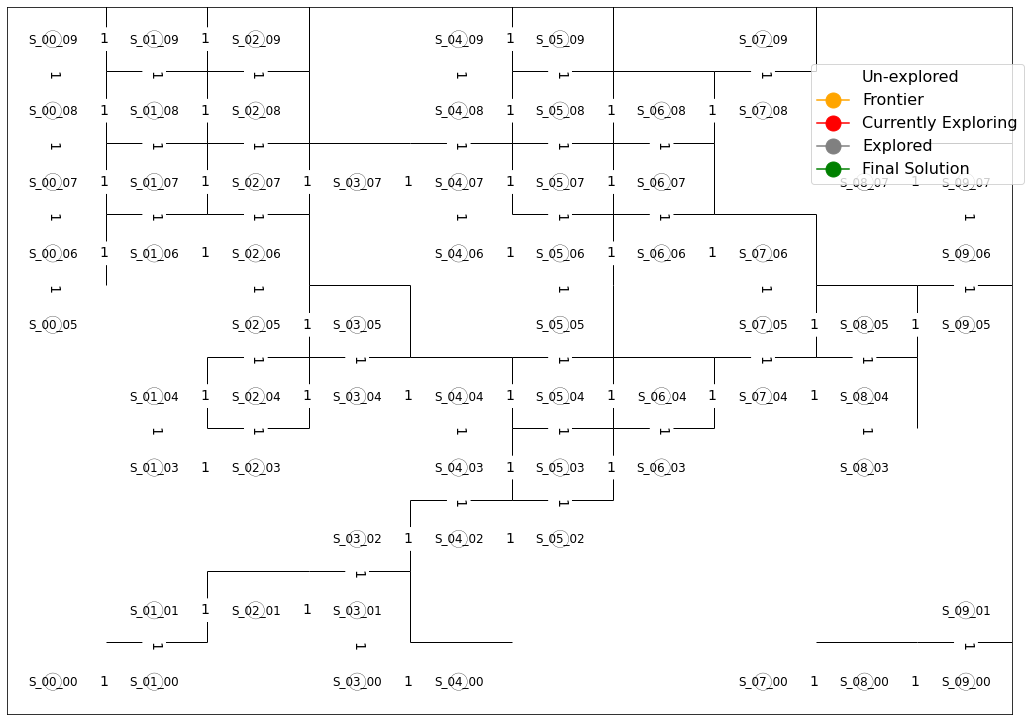

In [11]:
show_map(maze_graph_data)

- <font color=dark-magenta>TASK:</font> Inspect the map and make sure you can map it to Figure 1. I.e. where is S_00_00 ?

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

<br>
S_00_00 is in the left bottom corner (i.e. the map/visualizaiton is flipped compared to Figure 1)

<br>

S_01_09 is the second from the left in the top row.

<br>

<div style="border:2px solid red"></div>

----

### Q3.2 Solving the graph problem

Now that the graph/map has been completed in Q3.1.6 (c), we will try to use A-star to find a viable path.

#### Q3.2.1 Define the problem using the AIMA toolbox:

Remember, we want to go from state S_00_00 to S_01_09:

- <font color=dark-magenta>TASK:</font>: Run the follwing code to instantiate the problem


In [12]:
maze_problem = GraphProblem('S_00_00', 'S_01_09', maze_map)

print("Initial state: " + maze_problem.initial)
print("Goal state: "    + maze_problem.goal)

Initial state: S_00_00
Goal state: S_01_09


----

#### Q3.2.2 (a) Define the A-star search function

The cells below define an implementation of A-star (utilizing a few helper functions from the AIMA toolbox). 


- <font color=dark-magenta>TASK:</font>
 - Inspect the source code for the `search.py` (or the original source in https://github.com/aimacode/aima-python/blob/master/search.py ) and make sure you identify the main steps in the algorithm (e.g. compare to the description in AIMA). Compared to the original source, the modified A* function included below allows us to easily plot the solutions etc.

 - Execute the following cells to define the A-star search function 

- Hint: It is fine to just run these cell and move on and potentially inspect the code later!


In [13]:
def my_best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None


In [14]:
def my_astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = my_best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

----

#### Q3.2.4 Run the solver

##### Q3.2.4 (a) Run the solver - simple trace

The A* functions above is a generic implementation which can take different problems and heuristic functions.

- <font color=dark-magenta>TASK:</font> Execute the following cell to run A-star on our particular maze problem and visualize the final solution. 


In [15]:
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(problem=maze_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")


----------------------------------------
Identified goal state:<Node S_01_09>
----------------------------------------
Solution trace:[<Node S_01_09>, <Node S_01_08>, <Node S_02_08>, <Node S_02_07>, <Node S_02_06>, <Node S_02_05>, <Node S_03_05>, <Node S_03_04>, <Node S_04_04>, <Node S_04_03>, <Node S_04_02>, <Node S_03_02>, <Node S_03_01>, <Node S_02_01>, <Node S_01_01>, <Node S_01_00>, <Node S_00_00>]
----------------------------------------


- <font color=dark-magenta>TASK:</font> Identify the heuristic function used for the Maze problem (you'll need to inspect the code below, `search.py` and specifically the `GraphProblem` class) 


<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

Remember that the heuristic function is used by A* to help guide the search in the direction of the goal. 

If we inspect our my_astar_search_graph function, we can see that when we don't provide a different heuristic function (h), it will default to using the h function defined in our problem. If we further investigate the GraphProblem class (which we used in Q3.2.1, and whose definition can be found in search.py of the AIMA toolbox), we can see that it contains an h function that returns the straight line distance (Euclidean distance) between the node and the goal. This is our default heuristic function.

<br>
<div style="border:2px solid red"></div>

----

##### Q3.2.4 (b) Run the solver - full trace [optional]

- You can obtain a full trace of the A-star solution by executing the following code with `do_full_visualization=True`. However, be aware that the visualisation is not rendered real-time and it will (typically) be presented as individual figures after the solution has been computed.

In [16]:
do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []        
    display_visual(maze_graph_data, user_input=False, 
               algorithm=my_astar_search_graph, 
               problem=maze_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

----

### Q3.3.2 Inspect the solution


- <font color=dark-magenta>TASK:</font> Is the solution returned by the A-star optimal (hint: you may want to lookup the definition of an optimal solution in AIMA / lecture notes)? Is it supposed to be optimal given you knowledge of A-star and the applied heuristic?
- <font color=dark-magenta>TASK:</font> How many optimal solutions are there for this problem ?
- <font color=dark-magenta>TASK [optional]:</font> Determine how many nodes are explored with the current heuristic ?

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>
<br>
Recall that an optimal solution is defined as the solution that has the lowest cost from the start to the goal point.
<br>
- Yes, it is an optimal solution. A* will always reach an optimal solution if its heuristic function is admissible. The Heuristic function can be considered admissible if it never overestimates the cost to the goal; that is, the cost estimate (in the case of our default, the Euclidean distance) will never be greater than the lowest actual path cost to the goal. Euclidean distance meets this criteria and thus our A* utilizing it will give an optimal solution.
<br>
- There are several equally good solutions (equal length).

<br>
<div style="border:2px solid red"></div>

----

### Q3.3.3 Heuristic function

#### Q3.3.3 (a) Heuristic function I

Note: The following question requires some programming. Please ask stuck and the lab assistants will guide you!

- <font color=dark-magenta>TASK:</font>  Modify the heuristic function currently used by A-star and set it to zero for all nodes. Note: This requires you to insert and/or modify code for example by writing a new h function in this notebook and parse it to my_astar_search_grapgh in Q3.2.4!
- <font color=dark-magenta>TASK:</font>  Rerun the A-star solver and inspect the solution - determine if and how the heuristic function has changed the solution (i.e. is it still a valid solution, is it optimal, etc)? How many nodes did it explore ?
- <font color=dark-magenta>TASK:</font>  A-star with $h(n)=0\,\forall n$ corresponds to a basic search method - which one (breadth first search, depth first search, uniform cost search, hill-climbing, etc) ?

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>
<br>Implemented in option 1 below:
h(n)= 0 (see option 1 below): In general having a h(n)=0 is an example of a uniform (best first) search but because we ALSO have equal weights on step costs, this learns to equal path cost for all nodes in the frontier (and reduces to a breath first in this special case). Thus the search has no way of organizing its frontier in a meaningful way, and as such simply explores them in the order that they were added to the frontier (alternatively it could break the ties by randomly ordering them but this would not lead to a consistent advantage). We can observe this in the visualization by the spiral search pattern the algorithm seems to take, expanding out in a wide breadth from the starting point with no general direction. We can also see that the search eventually settles on an optimal solution, however it takes near twice the number of iterations in order to do so because we don't have a heuristic that guides our search in the direction of the goal.

Other heuristic functions: See option II and III below for alternative heuristics etc. Look out for the optimal path and number of iterations needed to solve the problem.


---
***Option 1***: Changing heuristic by passing it to A* Search function (h(n)=0 )

In [17]:
# Create a heuristic function that returns 0 for each node.
def zero_heuristic(node):
    return 0

# Run our A* solution, using our zero_heuristic function as the parameter h.
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(maze_problem, h=zero_heuristic)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")

----------------------------------------
Identified goal state:<Node S_01_09>
----------------------------------------
Solution trace:[<Node S_01_09>, <Node S_01_08>, <Node S_01_07>, <Node S_01_06>, <Node S_02_06>, <Node S_02_05>, <Node S_02_04>, <Node S_03_04>, <Node S_04_04>, <Node S_04_03>, <Node S_04_02>, <Node S_03_02>, <Node S_03_01>, <Node S_02_01>, <Node S_01_01>, <Node S_01_00>, <Node S_00_00>]
----------------------------------------


---
***Option II:*** Changing heuristic by defining it directly in the A* Search function h(n=0)

In [18]:
# If we want to use the visualizer to see the zero-heuristic search in action, 
# we can instead define a new A* function with the heuristic built in.

def my_zero_astar_search_graph(problem):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    We specify the heuristic (h) function below."""
    def h(node):
        return 0
    
    h = memoize(h, 'h')
    iterations, all_node_colors, node = my_best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)

# Run our A* solution, using our zero_heuristic function as the parameter h.
all_node_colors=[]
iterations, all_node_colors, node = my_zero_astar_search_graph(maze_problem)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")

----------------------------------------
Identified goal state:<Node S_01_09>
----------------------------------------
Solution trace:[<Node S_01_09>, <Node S_01_08>, <Node S_01_07>, <Node S_01_06>, <Node S_02_06>, <Node S_02_05>, <Node S_02_04>, <Node S_03_04>, <Node S_04_04>, <Node S_04_03>, <Node S_04_02>, <Node S_03_02>, <Node S_03_01>, <Node S_02_01>, <Node S_01_01>, <Node S_01_00>, <Node S_00_00>]
----------------------------------------


In [19]:
do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []        
    display_visual(maze_graph_data, user_input=False, 
               algorithm=my_zero_astar_search_graph, 
               problem=maze_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

---
***Option III)*** Changing heuristic by overriding the Problem classes default h function

For this, we will utilize a different heuristic: The Manhattan distance (see: https://en.wikipedia.org/wiki/Taxicab_geometry)

This heuristic is defined as the sum of the absolute values of the differences between node and goal coordinate:

dist = abs(node_x - goal_x) + abs(node_y - goal_y)

In [20]:
class ManhattanGraphProblem(GraphProblem):
    
    def __init__(self, initial, goal, graph):
        super().__init__(initial, goal, graph)
        
    def h(self, node):
        """h function is manhattan distance from a node's state to goal."""
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if type(node) is str:
                return int(abs(locs[node][0]-locs[self.goal][0]) + abs(locs[node][1]-locs[self.goal][1]))

            return int(abs(locs[node.state][0]-locs[self.goal][0]) + abs(locs[node.state][1]-locs[self.goal][1]))
        else:
            return infinity


manhattan_maze_problem = ManhattanGraphProblem('S_00_00', 'S_01_09', maze_map)


In [21]:
# Run our A* solution, passing our new custom 
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(manhattan_maze_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")

----------------------------------------
Identified goal state:<Node S_01_09>
----------------------------------------
Solution trace:[<Node S_01_09>, <Node S_01_08>, <Node S_01_07>, <Node S_01_06>, <Node S_02_06>, <Node S_02_05>, <Node S_02_04>, <Node S_03_04>, <Node S_04_04>, <Node S_04_03>, <Node S_04_02>, <Node S_03_02>, <Node S_03_01>, <Node S_02_01>, <Node S_01_01>, <Node S_01_00>, <Node S_00_00>]
----------------------------------------


In [22]:
do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []        
    display_visual(maze_graph_data, user_input=False, 
               algorithm=my_astar_search_graph, 
               problem=manhattan_maze_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

<br>
<div style="border:2px solid red"></div>

---

#### Q3.3.3 (b) Heuristic function II [optional]

- <font color=dark-magenta>TASK:</font>  Change the heuristic function currently used by A-star into a inconsistent heuristic (i.e. you may want to look up the definition of a consistent heuristic in AIMA) [note: require you to insert/modify code]
- <font color=dark-magenta>TASK:</font>  Rerun the A-star solver. Determine if and how the heuristic function has changed the solution (i.e. is it still a valid solution, is it optimal, etc)?

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>
<br>
A simple inconsistent heuristic could be a random function which draws from a uniform distribution $U(0, 10*m)$ where m is the maximum path length in the graph: This will break the triangle inequality for certain nodes. It might still lead to an optimal solution, but there are no longer any guarantees (and it should regardless take more iterations).

We will leave the implementation for eager students.

<br>
<div style="border:2px solid red"></div>

----
----

### Q3.4 Open AI Gym [open-ended]


**Introduction**: 
We will attempt to solve the Open AI Gym FrozenLake maze problem using A*.

----

#### Q3.4.1: Installing Open AI Gym...
- <font color=dark-magenta>TASK:</font> Install the Python-based Open AI Gym (Githib: https://github.com/openai/gym). An installation guide can be found at https://gymnasium.farama.org/index.html (avoid building from source if possible). 
    - On a Windows machines: Run "pip install --user gym[atari]" from an Anaconda prompt. You may have to restart your Python kernel.

-----

#### Q3.4.2: [optional] Complete the Open Gym Tutorial - the Cartpole environment
- <font color=dark-magenta>TASK:</font> Walk through the CartPole tutorial and perhaps run the code from the [official description](https://gym.openai.com/envs/CartPole-v1/) and inspecting the environment definition (Python code; available via [github](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py))
 - Note: Depending on your programming background you may find it useful to use standard Python (i.e., command line or an IDE, e.g. [PyCharm](https://www.jetbrains.com/pycharm/) or [vscode](https://code.visualstudio.com/)) when programming against the Open AI gym.

----

#### Q3.4.3: PEAS Analysis of The Frozen Lake Environment

In this part, we will analyse the Frozen Lake enviroment from the Open AI Gym. The goal is to make a PEAS analysis of this environment.

- <font color=dark-magenta>TASK: </font> Explore the [Frozen Lake environment](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/) in the Open AI Gym and make sure to inspect the [source code](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py). Make an initial  analysis of the Task Environment by identifying the states, actions and rewards in this environment. Executing the code below may help you appreciate how the environment is represented in Python.

In [23]:
import gym
env = gym.make('FrozenLake-v1')
env.reset()

print("--------------------------------") 
env.render()
print("\n--------------------------------\n")

print("Observation/states: %s" % (env.observation_space))
print("Action space: %s" % (env.action_space))
print("Rewards: " + str(env.reward_range))

env.close()

--------------------------------

--------------------------------

Observation/states: Discrete(16)
Action space: Discrete(4)
Rewards: (0, 1)


<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

Environment: A virtual maze environment.<br>
States: S, F, H G <br>
Actions: "Left","Down","Right","Up" (0,1,2,3) <br>
Rewards are received from the environment which effectively defines the performance measure for us: S=0 (starting state), F= 0, H=0 (terminal state), G= 1 (terminal state)<br>

<br>
<div style="border:2px solid red"></div>

---

#### Q3.4.4: Implement an agent

- <font color=dark-magenta>TASK: </font>  Implement an agent that takes random actions for the Frozen lake environment with the argument set to `is_slippery=False`. 
Your agent should display:
 * a rendering of the environment (use 'env.render()')
 * the observation/state (a coordinate or similar)
 * the action
 * the reward obtained
 * an indication if the agent has succeeded (env.step() usually returns this information)


In [24]:
# INSERT YOUR CODE HERE

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

In [25]:
import gym
env = gym.make('FrozenLake-v1', is_slippery=False)
env.reset()

print("--------------------------------") # this part is optional
print("\nStarting Condition:")
env.render()
done = False
while not done: 
    action = env.action_space.sample() # take random action from the available actions
    
    print("--------------------------------") 
    print("\nComputing...: The agent has decided on the following action:")
   
    observation, reward, done, _, info = env.step(action)     
    
    env.render()
        
    print("\n..so the new state of the world is \n\tState=%s \n\tReward=%s\n\tDone=%s\n\tInfo=%s\n" % (observation,reward, done, info)) # this part is optional
    
    if done:
        print("--------------------------------") 
        if reward == 1.0:
            print("Great you made it across the lake")
        else:
            print("Sorry, you did not make it - try again")
        print("--------------------------------") 
           
    
env.close()

--------------------------------

Starting Condition:
--------------------------------

Computing...: The agent has decided on the following action:

..so the new state of the world is 
	State=0 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

--------------------------------

Computing...: The agent has decided on the following action:

..so the new state of the world is 
	State=0 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

--------------------------------

Computing...: The agent has decided on the following action:

..so the new state of the world is 
	State=0 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

--------------------------------

Computing...: The agent has decided on the following action:

..so the new state of the world is 
	State=1 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

--------------------------------

Computing...: The agent has decided on the following action:

..so the new state of the world is 
	State=5 
	Reward=0.0
	Done=True
	Info={'prob': 1.0}

------------

<div style="border:2px solid red"></div>

- <font color=dark-magenta>TASK:</font> Solve the 'FrozenLake8x8-v1' problem using A-star with the default heuristic function assuming that the environment is deterministic. You may find the code snippets and helper function included below useful. Hint: is is absolutely critical that you understand what the `is_slippery` argument does!

In [28]:
# If working on a personal machine and the gym env is not recognizing the is_slippery keyword,
# be sure to upgrade gym to the latest version (pip install --upgrade gym)

import gym
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
env.reset()
env.render()

In [29]:
def env2statespace(env):
    """ 
    This simple parser demonstrates how you can extract the state space from the Open AI env. We *assume* full observability, i.e., we can directly ignore Hole states. Alternatively, 
    we could place a very high step cost to a Hole state or use a directed representation (i.e., you can go to a Hole state but never return). Feel free to experiment with both options, if time permits.

    Input:
        env: an Open AI Env follwing the std in the FrozenLake-v1 env

    Output:
        state_space_locations : a dict with the available states
        state_space_actions   : a dict of dict with available actions in each state
        state_start_id        : the start state
        state_goal_id         : the goal state  

        These objects are enough to define a Graph problem using the AIMA toolbox, e.g., using  
        UndirectedGraph, GraphProblem and astar_search 

    Notice: the implementation is very explicit to demonstarte all the steps (it could be made more compact/elegant!)            
    """
    state_space_locations = {} # create a dict
    for i in range(env.desc.shape[0]):
        for j in range(env.desc.shape[1]):   
            if not (b'H' in env.desc[i,j]):
                state_id = "S_"+str(int(i))+"_"+str(int(j) )
                state_space_locations[state_id] = (int(i),int(j))
                if env.desc[i,j] == b'S':
                    state_initial_id = state_id                                                 
                elif env.desc[i,j] == b'G':
                    state_goal_id = state_id                      

                #-- Generate state / action list --#
                # First define the set of actions in the defined coordinate system             
                actions = {"west": [-1,0],"east": [+1,0],"north": [0,+1], "south": [0,-1]}
                state_space_actions = {}
                for state_id in state_space_locations:                                       
                    possible_states = {}
                    for action in actions:
                        #-- Check if a specific action is possible --#
                        delta = actions.get(action)
                        state_loc = state_space_locations.get(state_id)
                        state_loc_post_action = [state_loc[0]+delta[0],state_loc[1]+delta[1]]

                        #-- Check if the new possible state is in the state_space, i.e., is accessible --#
                        state_id_post_action = "S_"+str(state_loc_post_action[0])+"_"+str(state_loc_post_action[1])                        
                        if state_space_locations.get(state_id_post_action) != None:
                            possible_states[state_id_post_action] = 1 
                        
                    #-- Add the possible actions for this state to the global dict --#                              
                    state_space_actions[state_id] = possible_states

    return state_space_locations, state_space_actions, state_initial_id, state_goal_id

In [30]:
# Create a dict representation of the state space
state_space_locations, state_space_actions, state_initial_id, state_goal_id = env2statespace(env)

In [31]:
# Ouput so we can validate the representation
state_space_locations, state_space_actions, state_initial_id, state_goal_id

({'S_0_0': (0, 0),
  'S_0_1': (0, 1),
  'S_0_2': (0, 2),
  'S_0_3': (0, 3),
  'S_0_4': (0, 4),
  'S_0_5': (0, 5),
  'S_0_6': (0, 6),
  'S_0_7': (0, 7),
  'S_1_0': (1, 0),
  'S_1_1': (1, 1),
  'S_1_2': (1, 2),
  'S_1_3': (1, 3),
  'S_1_4': (1, 4),
  'S_1_5': (1, 5),
  'S_1_6': (1, 6),
  'S_1_7': (1, 7),
  'S_2_0': (2, 0),
  'S_2_1': (2, 1),
  'S_2_2': (2, 2),
  'S_2_4': (2, 4),
  'S_2_5': (2, 5),
  'S_2_6': (2, 6),
  'S_2_7': (2, 7),
  'S_3_0': (3, 0),
  'S_3_1': (3, 1),
  'S_3_2': (3, 2),
  'S_3_3': (3, 3),
  'S_3_4': (3, 4),
  'S_3_6': (3, 6),
  'S_3_7': (3, 7),
  'S_4_0': (4, 0),
  'S_4_1': (4, 1),
  'S_4_2': (4, 2),
  'S_4_4': (4, 4),
  'S_4_5': (4, 5),
  'S_4_6': (4, 6),
  'S_4_7': (4, 7),
  'S_5_0': (5, 0),
  'S_5_3': (5, 3),
  'S_5_4': (5, 4),
  'S_5_5': (5, 5),
  'S_5_7': (5, 7),
  'S_6_0': (6, 0),
  'S_6_2': (6, 2),
  'S_6_3': (6, 3),
  'S_6_5': (6, 5),
  'S_6_7': (6, 7),
  'S_7_0': (7, 0),
  'S_7_1': (7, 1),
  'S_7_2': (7, 2),
  'S_7_4': (7, 4),
  'S_7_5': (7, 5),
  'S_7_6': (

- <font color=dark-magenta>TASK (cont.):</font> Now you need to apply the functions/code used to solve the problems in Q3.1 to to this specific context. That means build a suitable graph, potentially visualising the graph, turn it into a graph problem, solve the graph problem , potentially visualise the graph problem etc.

In [32]:
# Insert the solution here to find and output the solution using A-star

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

In [33]:
frozen_lake_map = UndirectedGraph(state_space_actions)
frozen_lake_map.locations = state_space_locations

In [34]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in frozen_lake_map.locations.keys()}
node_positions = frozen_lake_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in frozen_lake_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in frozen_lake_map.graph_dict.items() for k2, v2 in v.items()}

frozen_lake_graph_data = {  'graph_dict' : frozen_lake_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

print("Done creating the graph object")

Done creating the graph object


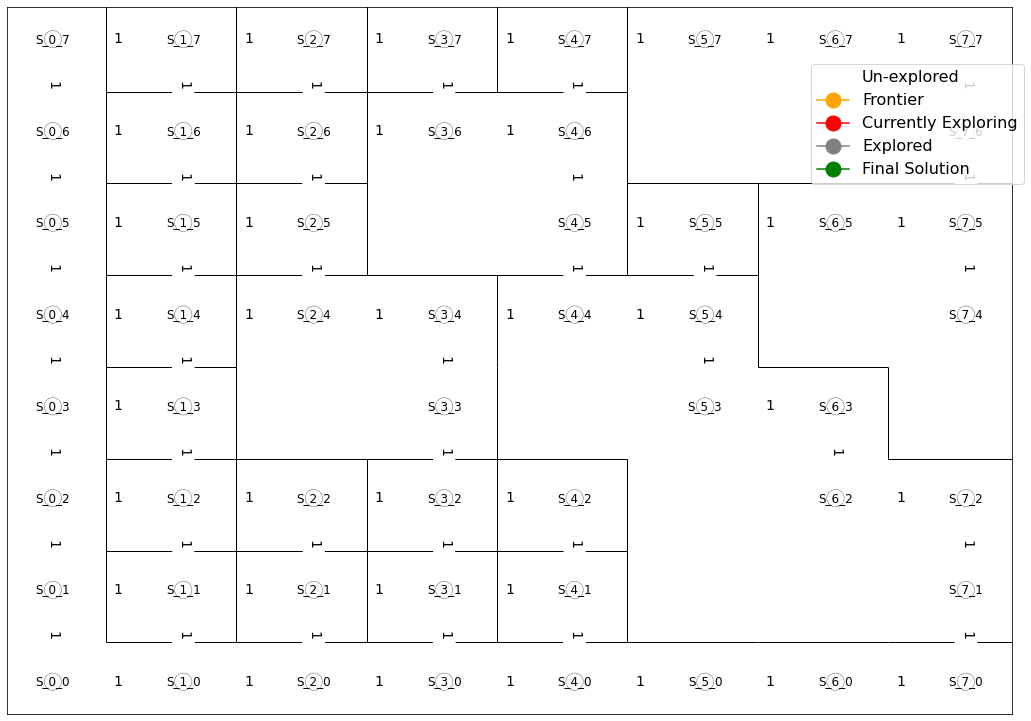

In [35]:
# NOTE: The map haz rotated 90 degrees anti-clockwize. 
# The original start location is in the bottom left, and the goal is in the top right

show_map(frozen_lake_graph_data)

In [36]:
frozen_lake_problem = GraphProblem(state_initial_id, state_goal_id, frozen_lake_map)

print("Initial state: " + frozen_lake_problem.initial)
print("Goal state: "    + frozen_lake_problem.goal)

Initial state: S_0_0
Goal state: S_7_7


In [37]:
all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(problem=frozen_lake_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != "S_00_00":    
    cnode = cnode.parent
    if cnode is None:
        break
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")

----------------------------------------
Identified goal state:<Node S_7_7>
----------------------------------------
Solution trace:[<Node S_7_7>, <Node S_6_7>, <Node S_5_7>, <Node S_4_7>, <Node S_4_6>, <Node S_4_5>, <Node S_4_4>, <Node S_3_4>, <Node S_2_4>, <Node S_1_4>, <Node S_0_4>, <Node S_0_3>, <Node S_0_2>, <Node S_0_1>, <Node S_0_0>]
----------------------------------------


In [38]:
do_full_visualization = True
if do_full_visualization:     
    # WARNING the FULL visualisation might not work very well on some computers due to 
    # the large graph and the many iterations required.The visualisaiton will 
    # typically compute the solution and do the plotting at the end - and it often takes a long time ...
    #
    print("::: Full Visualization ::::")
    all_node_colors = []        
    display_visual(frozen_lake_graph_data, user_input=False, 
               algorithm=my_astar_search_graph, 
               problem=frozen_lake_problem)

::: Full Visualization ::::


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

<br>
<div style="border:2px solid red"></div>

- <font color=dark-magenta>TASK:</font> Check that the solution found by A-star is correct and optimal. Reflect on the number of iterations required to find the solution.


<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

It is optimal. 

<br>

<div style="border:2px solid red"></div>


- <font color=dark-magenta>TASK:</font> Execute the solution in the Open AI Environment.

In [39]:
# Insert the solution here; note this will be several lines of code

---

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

In [40]:
import numpy as np
import gym

is_stochastic = False  

# Generate the specific problem 
env = gym.make('FrozenLake8x8-v1',is_slippery=is_stochastic)

# Let's visualize the problem/env
print(env.desc)

# Create a dict representation of the state space
state_space_locations, state_space_actions, state_initial_id, state_goal_id = env2statespace(env)

# SOLUTION BEGIN
maze_map = UndirectedGraph(state_space_actions)
maze_map.locations = state_space_locations
maze_problem = GraphProblem(state_initial_id, state_goal_id, maze_map)
# SOLUTION END

all_node_colors=[]
iterations, all_node_colors, node = my_astar_search_graph(problem=maze_problem, h=None)

#-- Trace the solution --#
solution_path = [node]
cnode = node.parent
solution_path.append(cnode)
while cnode.state != state_initial_id:
    cnode = cnode.parent  
    solution_path.append(cnode)

print("----------------------------------------")
print("Identified goal state:"+str(solution_path[0]))
print("----------------------------------------")
print("Solution trace:"+str(solution_path))
print("----------------------------------------")


[[b'S' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'H' b'H' b'F' b'F' b'F' b'H' b'F']
 [b'F' b'H' b'F' b'F' b'H' b'F' b'H' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'G']]
----------------------------------------
Identified goal state:<Node S_7_7>
----------------------------------------
Solution trace:[<Node S_7_7>, <Node S_6_7>, <Node S_5_7>, <Node S_4_7>, <Node S_4_6>, <Node S_4_5>, <Node S_4_4>, <Node S_3_4>, <Node S_2_4>, <Node S_1_4>, <Node S_0_4>, <Node S_0_3>, <Node S_0_2>, <Node S_0_1>, <Node S_0_0>]
----------------------------------------


In [41]:
# Very basic implementation of a node state to action parser

def get_action_from_states(cur_node, next_node):
    # Action to int representations (taken from the FrozenLake github page)
    # (https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py)
    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3

    # Get the coordinates from the state string for each node
    x1 = cur_node.state[2]
    y1 = cur_node.state[4]
    x2 = next_node.state[2]
    y2 = next_node.state[4]
    
    # We need to account for rotation between graph and environment
    # X on our graph became Y on our environment (handles up/down)
    # Y on our graph became X on our environment (handles left/right)
    if x1 == x2:
        if y1 > y2:
            return LEFT
        else:
            return RIGHT
    else:
        if x1 > x2:
            return UP
        else:
            return DOWN

In [42]:
# Our path in correct start to end order
steps = solution_path[::-1]
print(steps)

[<Node S_0_0>, <Node S_0_1>, <Node S_0_2>, <Node S_0_3>, <Node S_0_4>, <Node S_1_4>, <Node S_2_4>, <Node S_3_4>, <Node S_4_4>, <Node S_4_5>, <Node S_4_6>, <Node S_4_7>, <Node S_5_7>, <Node S_6_7>, <Node S_7_7>]


In [43]:
print("The optimal plan has " + str(len(steps)) + "steps")

The optimal plan has 15steps


In [44]:
observation = env.reset() # reset the state of the env to the starting state     
print('Start state:')
env.render()
print('\n')
doen = False
for step in range(len(steps)-1):    

    action = get_action_from_states(steps[step], steps[step+1]) # your agent goes here

    observation, reward, done, _, info =  env.step(action) # observe what happends when you take the action    

    env.render()
        
    print("\n..so the new state of the world is \n\tState=%s \n\tReward=%s\n\tDone=%s\n\tInfo=%s" % (observation,reward, done, info)) # this part is optional
    
    # We know the path already, and as such know we will defenitely reach the goal
    # Therefore, we don't need to check for a done hole condition (done && reward == -1)
    if(done):      
        print("--------------------------------") 
        if reward == 1.0:
            print("Great you made it across the lake")
        else:
            print("Sorry, you feel into a hole - try again")
        print("--------------------------------") 
        
        break
if(not done):
    print("--------------------------------")        
    print("Sorry, you did not make it in time - try again")
    print("--------------------------------") 

Start state:



..so the new state of the world is 
	State=1 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=2 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=3 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=4 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=12 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=20 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=28 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=36 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=37 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=38 
	Reward=0.0
	Done=False
	Info={'prob': 1.0}

..so the new state of the world is 
	State=39 
	Reward=0.0
	Done=Fal

<div style="border:2px solid red"></div>

----

#### Q3.4.5: A* in a stochastic environment

In this part, we are going to investigate what happens when we apply A* to a stochastic version of the FrozenLake environment (i.e. you do not know exactly where you will end up after taking a certain action).

- <font color=dark-magenta>TASK:</font> Change the `is_slippery=False` argument to the environment to `is_slippery=True` and rerun the plan/solution determined by A*. Rerun it again. Does it work ? Why or why not? What is the success rate? 

<div style="border:2px solid red"></div>
<font color="red">SOLUTION</font>

Rerun the solution above with the flag set to False. You should see that the fixed policy does not work as the random actions risk you falling in a hole in the lake. You may get lucky once in a while.

You notice that a predefined A* policy is not useful if the is stochasticity; you would not know what to do if you ended up in a state not in your plan. You could include re-planning by having A-star inside the loop (i.e. plan at every step) in an online fashion; however, this would still not take into account the stochastic nature of the environment. 

Later in the course we will look at mentions for learning optimal policies in stochastic environments. The policy will prescribe what to do in each individual and still be optimal in term of the rewards it receives. 


<div style="border:2px solid red"></div>